<a href="https://colab.research.google.com/github/vedricopane/DataScience-AnalisaDataKasusCovid19/blob/main/DataScience_AnalisaDataKasusCovid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Connect ke googledrive :

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


* Load data :

In [ ]:
import pandas as pd

cases_conf = pd.read_csv('/content/drive/MyDrive/Project/Data Science/Data Covid-19/confirmed_acc.csv')
pasien = pd.read_csv('/content/drive/MyDrive/Project/Data Science/Data Covid-19/patient.csv')
provinsi = pd.read_csv('/content/drive/MyDrive/Project/Data Science/Data Covid-19/province.csv', encoding='unicode_escape') #dilakukan encode karena eror saat read dataset, sehingga harus diencode dahulu.

In [ ]:
pasien.head()

,patient_id,gender,age,nationality,province,current_state,contacted_with,confirmed_date,released_date,deceased_date,hospital
0,1,female,31.0,indonesia,DKI Jakarta,released,NaN,2-Mar-20,13-Mar-20,NaN,RSPI Sulianti Saroso
1,2,female,64.0,indonesia,DKI Jakarta,released,1.0,2-Mar-20,16-Mar-20,NaN,RSPI Sulianti Saroso
2,3,female,33.0,indonesia,DKI Jakarta,released,1.0,6-Mar-20,13-Mar-20,NaN,RSPI Sulianti Saroso
3,4,female,34.0,indonesia,DKI Jakarta,isolated,1.0,6-Mar-20,NaN,NaN,RSPI Sulianti Saroso
4,5,male,55.0,indonesia,DKI Jakarta,isolated,1.0,8-Mar-20,NaN,NaN,RS Persahabatan


In [ ]:
provinsi.head()

,province_id,province_name,island,iso_code,capital_city,population,population_kmsquare,confirmed,deceased,released,longitude,latitude
0,1,Aceh,Sumatra,AC,Banda Aceh,4906835,86,4,0,0,9.672.895,3.869.994
1,2,Bali,Kepulauan Nusa Tenggara,BA,Denpasar,4104900,738,9,2,0,11.512.255,-825.731
2,3,Banten,Jawa,BT,Serang,11704877,1298,84,4,1,106.160.889,-6.315.299
3,4,Bengkulu,Sumatra,BE,Bengkulu,1844800,93,0,0,0,102.315.674,-3.414.725
4,5,DI Yogyakarta,Jawa,YO,Yogyakarta,3553100,1134,22,2,1,110.390.625,-7.863.382


## **Prediksi Total Kasus Terkonfirmasi di Indonesia**

Melakukan prediksi kasus 60 hari ke depan.

In [ ]:
cases_conf.head()

,date,cases
0,1/22/2020,0
1,1/23/2020,0
2,1/24/2020,0
3,1/25/2020,0
4,1/26/2020,0


In [ ]:
# Melakukan sorting untuk melihat kapan kasus covid pertama kali terjadi.
# Melakukan filter dan sorting dengan kasus 0 dan disorting berdasarkan tanggal.

(cases_conf[cases_conf['cases'] == 0].sort_values(by=['date'], ascending=False)).head()

,date,cases
39,3/1/2020,0
18,2/9/2020,0
17,2/8/2020,0
16,2/7/2020,0
15,2/6/2020,0


*insight

1. Data kasus terbaru pada tanggal 3/1/2020, maka kita sudah dapat kemungkinan kasus pertamanya setelah tanggal ini.

In [ ]:
# Melakukan konversi hari dari date yg dimulai dari tanggal 3/1/2020.

from datetime import datetime, timedelta

df = cases_conf.iloc[39:]
df['days'] = df['date'].map(lambda x: (datetime.strptime(x, '%m/%d/%Y') - datetime.strptime('3/1/2020', '%m/%d/%Y')).days)
df[['date', 'days', 'cases']]   #reorder column

<ipython-input-7-91f2acfc47ab>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days'] = df['date'].map(lambda x: (datetime.strptime(x, '%m/%d/%Y') - datetime.strptime('3/1/2020', '%m/%d/%Y')).days)


,date,days,cases
39,3/1/2020,0,0
40,3/2/2020,1,2
41,3/3/2020,2,2
42,3/4/2020,3,2
43,3/5/2020,4,2
44,3/6/2020,5,4
45,3/7/2020,6,4
46,3/8/2020,7,6
47,3/9/2020,8,19
48,3/10/2020,9,27


In [ ]:
# Prediksi

import numpy as np
from sklearn.model_selection import train_test_split
from scipy.optimize import curve_fit

def gompertz(a, c, t, t_0):
  Q = a * np.exp(-np.exp(-c * (t - t_0)))
  return Q

x = list(df['days'])    # variabel independent
y = list(df['cases'])   # variabel dependent

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.9, test_size=0.1, shuffle=False)

x_test_added = x_test + list(range((max(x_test) + 1), 60))    # 60 itu ialah untuk mengambil prediksi sebanyak 60 hari ke depan.
popt, pcov = curve_fit(gompertz, x_train, y_train, method='trf', bounds=([100, 0, 0], [6 * max(y_train), 0.15, 70]))
a, estimated_c, estimated_t_0 = popt
y_pred = gompertz(a, estimated_c, x_train + x_test_added, estimated_t_0)

<ipython-input-8-eaf583bfdaa4>:8: RuntimeWarning: overflow encountered in exp
  Q = a * np.exp(-np.exp(-c * (t - t_0)))


In [ ]:
y_pred

array([6.94453422e-03, 1.88295098e-02, 4.75043830e-02, 1.12095671e-01,
       2.48600952e-01, 5.20501753e-01, 1.03312552e+00, 1.95151092e+00,
       3.52071069e+00, 6.08657931e+00, 1.01143448e+01, 1.62018648e+01,
       2.50845667e+01, 3.76297134e+01, 5.48187449e+01, 7.77178331e+01,
       1.07438219e+02, 1.45089136e+02, 1.91726984e+02, 2.48304767e+02,
       3.15625683e+02, 3.94304201e+02, 4.84737062e+02, 5.87085640e+02,
       7.01270050e+02, 8.26974448e+02, 9.63662219e+02, 1.11059925e+03,
       1.26688317e+03, 1.43147639e+03, 1.60324086e+03, 1.78097279e+03,
       1.96343565e+03, 2.14939045e+03, 2.33762249e+03, 2.52696388e+03,
       2.71631192e+03, 2.90464320e+03, 3.09102366e+03, 3.27461503e+03,
       3.45467801e+03, 3.63057262e+03, 3.80175640e+03, 3.96778061e+03,
       4.12828520e+03, 4.28299265e+03, 4.43170126e+03, 4.57427802e+03,
       4.71065131e+03, 4.84080382e+03, 4.96476551e+03, 5.08260702e+03,
       5.19443348e+03, 5.30037872e+03, 5.40060007e+03, 5.49527359e+03,
      

In [ ]:
# 5 hari yang menjadi data test.

x_test

[36, 37, 38, 39, 40]

* **Grafik hasil prediksi :**

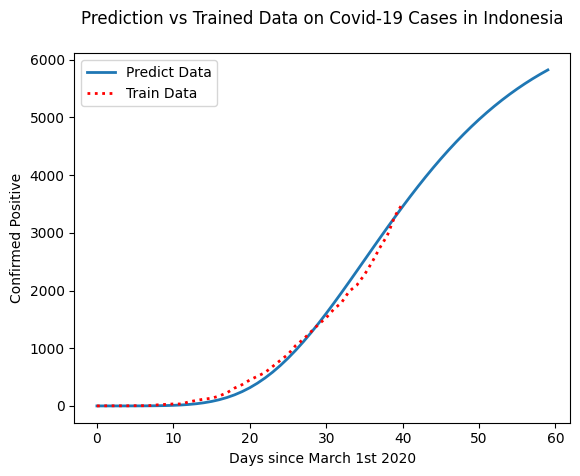

In [ ]:
import matplotlib.pyplot as plt

plt.plot(x_train + x_test_added, y_pred, linewidth=2, label='Predict Data')
plt.plot(x, y, linewidth=2, color='r', linestyle='dotted', label='Train Data')

plt.title('Prediction vs Trained Data on Covid-19 Cases in Indonesia\n')
plt.xlabel('Days since March 1st 2020')
plt.ylabel('Confirmed Positive')
plt.legend(loc='upper left')

*insight

1. Hasil prediksinya cukup bagus karena hasilnya hampir sama dengan train data.
2. Terjadi kenaikan yg signifikan dari hari ke-40 sampai ke-60.

In [ ]:
# Menampilkan hasil prediksi ke bentuk tabel dari hari ke 36 sampai ke 60

prediksi = pd.DataFrame({'day_pred': x_test_added, 'casses_pred': np.around(y_pred[36:])})

In [ ]:
prediksi

,day_pred,casses_pred
0,36,2716.0
1,37,2905.0
2,38,3091.0
3,39,3275.0
4,40,3455.0
5,41,3631.0
6,42,3802.0
7,43,3968.0
8,44,4128.0
9,45,4283.0


*insight

1. Setiap hari akan mengalami kenaikan kasus.

## **Visualisasi Data Pasien**

In [ ]:
pasien.head()

,patient_id,gender,age,nationality,province,current_state,contacted_with,confirmed_date,released_date,deceased_date,hospital
0,1,female,31.0,indonesia,DKI Jakarta,released,NaN,2-Mar-20,13-Mar-20,NaN,RSPI Sulianti Saroso
1,2,female,64.0,indonesia,DKI Jakarta,released,1.0,2-Mar-20,16-Mar-20,NaN,RSPI Sulianti Saroso
2,3,female,33.0,indonesia,DKI Jakarta,released,1.0,6-Mar-20,13-Mar-20,NaN,RSPI Sulianti Saroso
3,4,female,34.0,indonesia,DKI Jakarta,isolated,1.0,6-Mar-20,NaN,NaN,RSPI Sulianti Saroso
4,5,male,55.0,indonesia,DKI Jakarta,isolated,1.0,8-Mar-20,NaN,NaN,RS Persahabatan


In [ ]:
pasien.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   patient_id      893 non-null    int64  
 1   gender          156 non-null    object 
 2   age             156 non-null    float64
 3   nationality     156 non-null    object 
 4   province        156 non-null    object 
 5   current_state   166 non-null    object 
 6   contacted_with  27 non-null     float64
 7   confirmed_date  893 non-null    object 
 8   released_date   5 non-null      object 
 9   deceased_date   4 non-null      object 
 10  hospital        17 non-null     object 
dtypes: float64(2), int64(1), object(8)
memory usage: 76.9+ KB


### **Banyak kasus berdasarkan kolom current_state.**

In [ ]:
pasien['current_state'].value_counts()

isolated    143
deceased     15
released      8
Name: current_state, dtype: int64

In [ ]:
# Rata-rata umur pasien yg terkana Covid-19 berdasarkan gender.

male = pasien.loc[pasien['gender'] == 'male', 'age'].mean()
female = pasien.loc[pasien['gender'] == 'female', 'age'].mean()

print('Distribusi rata-rata umur pasien laki-laki : %i' %male, 'tahun')
print('Distribusi rata-rata umur pasien perempuan : %i' %female, 'tahun')

Distribusi rata-rata umur pasien laki-laki : 48 tahun
Distribusi rata-rata umur pasien perempuan : 47 tahun


* **Visualisasi Current State**

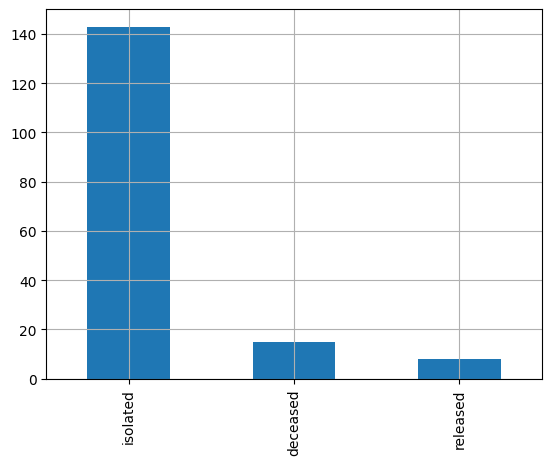

In [ ]:
# pasien.current_state.value_counts()
pasien['current_state'].value_counts().plot.bar().grid()

* **Visualisasi banyaknya kasus berdasarkan jenis kelamin**

<Axes: xlabel='gender', ylabel='count'>

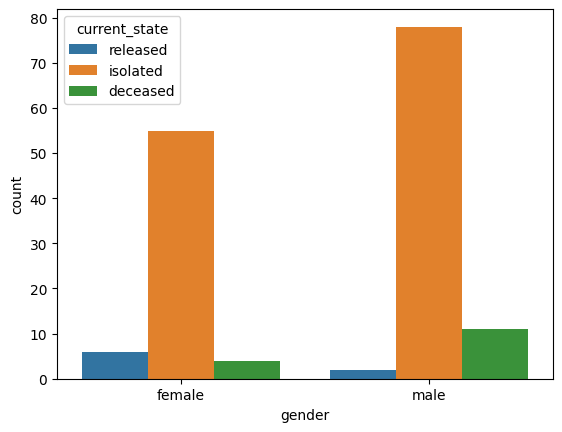

In [ ]:
import seaborn as sns

sns.countplot(x='gender', hue='current_state', data=pasien)

*insight

1. Male/laki-laki lebih banyak jumlah kasus ketimbang perempuan.
2. Laki-laki dan perempuan paling banyak mengalami isolated.

### **Banyaknya daerah menyumbang kasus terbanyak**

In [ ]:
pasien['province'].value_counts()

DKI Jakarta         124
Jawa Barat            9
Jawa Timur            7
Banten                6
Jawa Tengah           4
Kalimantan Barat      2
Bali                  1
DI Yogyakarta         1
Sulawesi Utara        1
Kepulauan Riau        1
Name: province, dtype: int64

* **Visualisasi**

<Axes: >

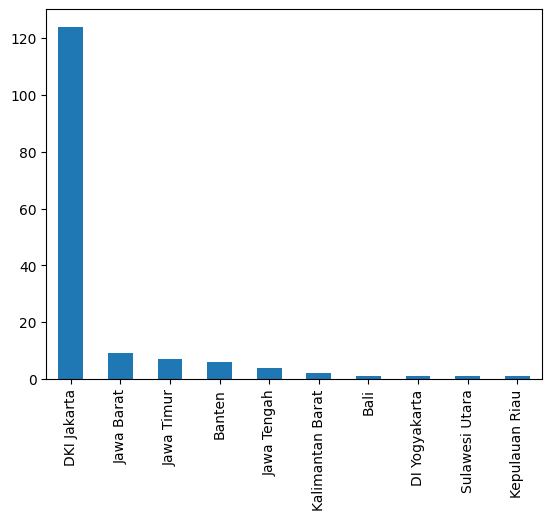

In [ ]:
pasien['province'].value_counts().plot.bar()

*insight

1. Jakarta memiliki kasus terbanyak.

<Axes: >

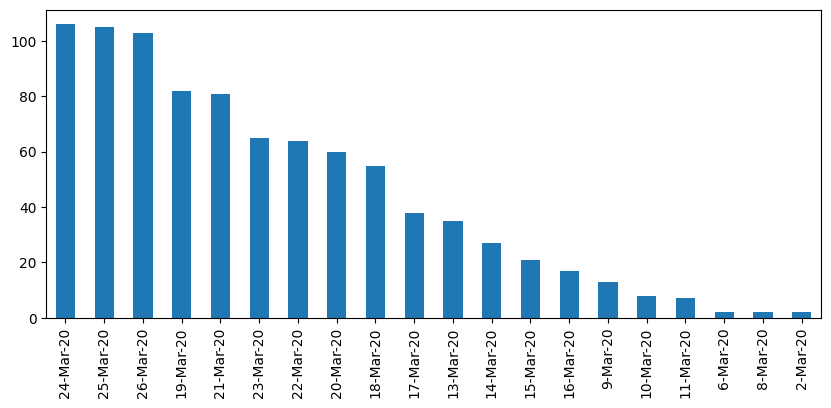

In [ ]:
plt.figure(figsize=(10,4))
pasien['confirmed_date'].value_counts().plot.bar()

*insight

1. Kasus paling tinggi berada pada tanggal 24-Mar-2020

## **Visualisasi Data Provinsi**

In [ ]:
provinsi.head()

,province_id,province_name,island,iso_code,capital_city,population,population_kmsquare,confirmed,deceased,released,longitude,latitude
0,1,Aceh,Sumatra,AC,Banda Aceh,4906835,86,4,0,0,9.672.895,3.869.994
1,2,Bali,Kepulauan Nusa Tenggara,BA,Denpasar,4104900,738,9,2,0,11.512.255,-825.731
2,3,Banten,Jawa,BT,Serang,11704877,1298,84,4,1,106.160.889,-6.315.299
3,4,Bengkulu,Sumatra,BE,Bengkulu,1844800,93,0,0,0,102.315.674,-3.414.725
4,5,DI Yogyakarta,Jawa,YO,Yogyakarta,3553100,1134,22,2,1,110.390.625,-7.863.382


In [ ]:
print('Total data : ', provinsi.shape, '\n')
provinsi.info()

Total data :  (35, 12) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   province_id          35 non-null     int64 
 1   province_name        35 non-null     object
 2   island               35 non-null     object
 3   iso_code             35 non-null     object
 4   capital_city         35 non-null     object
 5   population           35 non-null     int64 
 6   population_kmsquare  35 non-null     int64 
 7   confirmed            35 non-null     int64 
 8   deceased             35 non-null     int64 
 9   released             35 non-null     int64 
 10  longitude            35 non-null     object
 11  latitude             35 non-null     object
dtypes: int64(6), object(6)
memory usage: 3.4+ KB


### **Banyaknya kasus berdasarkan pulau**

In [ ]:
provinsi['island'].value_counts()

Sumatra                    10
Jawa                        6
Sulawesi                    6
Kalimantan                  5
Kepulauan Nusa Tenggara     3
Kepulauan Maluku            2
Papua                       2
Unknown                     1
Name: island, dtype: int64

*insight

1. Kasus terbanyak berada pada pulau sumatra.

In [ ]:
# Fungsi grouping berdasarkan data yg diinginkan.

def fungsiGroup(column, ds):
  dataset = ds
  print((dataset.groupby(column).sum()[['confirmed']]).sort_values(by=column, ascending=False))

In [ ]:
# Melihat banyaknya kasus yg confirmed berdasarkan pulau/island.

fungsiGroup('island', provinsi)

                         confirmed
island                            
Unknown                         20
Sumatra                         29
Sulawesi                        35
Papua                            7
Kepulauan Nusa Tenggara         11
Kepulauan Maluku                 2
Kalimantan                      22
Jawa                           911


<ipython-input-26-84c73959eeac>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print((dataset.groupby(column).sum()[['confirmed']]).sort_values(by=column, ascending=False))


*insight

1. Kasus covid yg ter-confirmed paling banyak berada di pulau jawa.

In [ ]:
# Menyimpan data ke bentuk dataframe, tujuannya untuk bisa divisualisasikan.

df = pd.DataFrame((provinsi.groupby('island').sum()[['confirmed']]).sort_values(by='confirmed', ascending=False))

<ipython-input-28-864895e1d276>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = pd.DataFrame((provinsi.groupby('island').sum()[['confirmed']]).sort_values(by='confirmed', ascending=False))


In [ ]:
df

,confirmed
island,
Jawa,911
Sulawesi,35
Sumatra,29
Kalimantan,22
Unknown,20
Kepulauan Nusa Tenggara,11
Papua,7
Kepulauan Maluku,2


In [ ]:
# Pada dataframe di atas hanya kolom island masih berbentuk index dan kolom tidak rapi, maka
# kita akan perbaiki menjadi 2 kolom yaitu island dan confirmed.

df['island'] = df.index
df.reset_index(drop=True, inplace=True)

In [ ]:
# Reorder columns

df = df[['island', 'confirmed']]

In [ ]:
df

,island,confirmed
0,Jawa,911
1,Sulawesi,35
2,Sumatra,29
3,Kalimantan,22
4,Unknown,20
5,Kepulauan Nusa Tenggara,11
6,Papua,7
7,Kepulauan Maluku,2


* **Visualisasi**

In [ ]:
import plotly.express as px
import plotly.offline as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

fig = px.pie(values=df['confirmed'], names=df['island'])
fig.update_layout(font=dict(size=15, color='#242323'))

py.iplot(fig)

In [ ]:
dataset = provinsi[['province_name', 'capital_city', 'population_kmsquare', 'confirmed', 'deceased']]

In [ ]:
dataset.head()

,province_name,capital_city,population_kmsquare,confirmed,deceased
0,Aceh,Banda Aceh,86,4,0
1,Bali,Denpasar,738,9,2
2,Banten,Serang,1298,84,4
3,Bengkulu,Bengkulu,93,0,0
4,DI Yogyakarta,Yogyakarta,1134,22,2


In [ ]:
provinsi.head()

,province_id,province_name,island,iso_code,capital_city,population,population_kmsquare,confirmed,deceased,released,longitude,latitude
0,1,Aceh,Sumatra,AC,Banda Aceh,4906835,86,4,0,0,9.672.895,3.869.994
1,2,Bali,Kepulauan Nusa Tenggara,BA,Denpasar,4104900,738,9,2,0,11.512.255,-825.731
2,3,Banten,Jawa,BT,Serang,11704877,1298,84,4,1,106.160.889,-6.315.299
3,4,Bengkulu,Sumatra,BE,Bengkulu,1844800,93,0,0,0,102.315.674,-3.414.725
4,5,DI Yogyakarta,Jawa,YO,Yogyakarta,3553100,1134,22,2,1,110.390.625,-7.863.382


In [ ]:
# Menghitung banyaknya data yg null/kosong.

dataset.isnull().sum()

province_name          0
capital_city           0
population_kmsquare    0
confirmed              0
deceased               0
dtype: int64

*insight

1. Data tidak ada yg null/kosong, maka bisa dilanjutkan untuk analisa data.

## **Linear Regresi Dataset Provinsi**

In [ ]:
dtLR = dataset.copy()
dtLR.shape

(35, 5)

In [ ]:
dtLR.head()

,province_name,capital_city,population_kmsquare,confirmed,deceased
0,Aceh,Banda Aceh,86,4,0
1,Bali,Denpasar,738,9,2
2,Banten,Serang,1298,84,4
3,Bengkulu,Bengkulu,93,0,0
4,DI Yogyakarta,Yogyakarta,1134,22,2


* Visualisasi

Melihat korelasi/hubungan setiap variabel/feature/kolom pada dataframe dtLR.

<ipython-input-46-d786774ee2f9>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



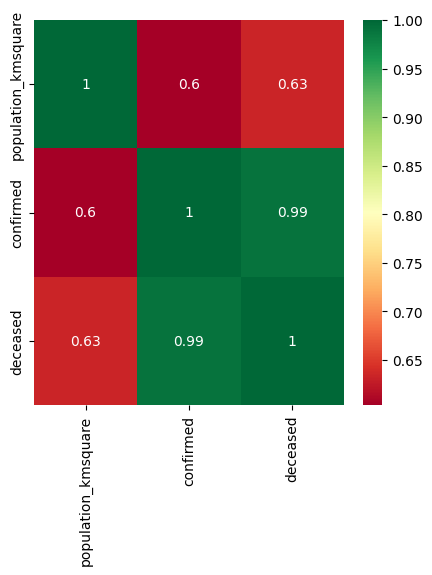

In [ ]:
plt.figure(figsize=(5,5))
p = sns.heatmap(dataset.corr(), annot=True, cmap='RdYlGn')

NB:

1. Untuk nilai korelasi, nilai mendekati 1, berarti nilai korelasi tinggi.
2. Korelasi hanya bisa dilakukan dengan data yg memiliki tipe data integer.


*insight

1. Varibel dengan korelasi tinggi, yaitu deceased - confirmed.
2. Untuk analisa kita akan fokus menggunakan kolom deceased - confirmed.

In [ ]:
# Menghapus kolom lain selain deceased - confirmed pada dataframe dtLR.
# karena kita fokus pada variabel dengan korelasi tinggi.

dtLR = dtLR.drop(['province_name', 'capital_city', 'population_kmsquare'], axis=1)

In [ ]:
dtLR.head()

,confirmed,deceased
0,4,0
1,9,2
2,84,4
3,0,0
4,22,2


In [ ]:
X_LR = dtLR.iloc[:, :-1].values     # variabel confirmed
Y_LR = dtLR.iloc[:, 1].values       # variabel deceased

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_LR, Y_LR, test_size=0.2, random_state=0)

In [ ]:
# Linear Regresi

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [ ]:
pred = regressor.predict(X_test)

* **Visualisasi plot**

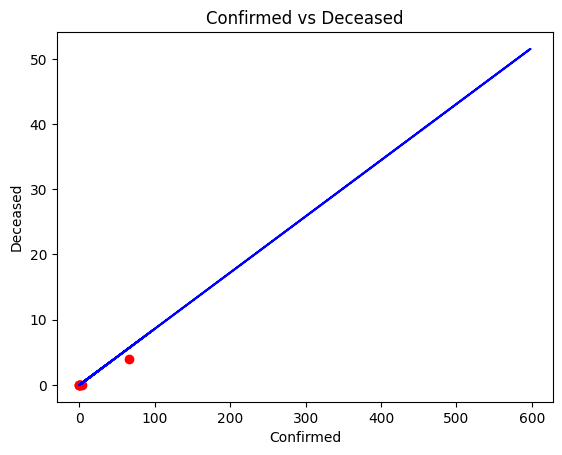

In [ ]:
plt.scatter(X_test, Y_test, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')

plt.title('Confirmed vs Deceased')
plt.xlabel('Confirmed')
plt.ylabel('Deceased')
plt.show()

*insight

1. Garis biru ialah data confirmed.
2. Semakin banyak nilai yg ter-confirmed, maka tingkat yg deceased lebih banyak.
3. Kasus deceased/meninggal itu dipengaruhi oleh banyaknya kasus yg ter-confirmed.

In [ ]:
!pip install scrape-instagram

In [ ]:
from scrape_instagram import *
response =instagram.comment_scrape(url_link="https://www.instagram.com/p/Crxp01QyzVM/")

It currently works on windows only
It currently works on windows only
It currently works on windows only
